In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy  as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, precision_score
%matplotlib inline
sns.set(rc={'figure.figsize':(15, 8)}, font_scale=1.3)

# Accessing Data

In [3]:
df = pd.read_csv('C:/Users/hamidreza/Documents/پروژه کارشناسی/KaggleV2-May-2016.csv')

In [3]:
df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.990000e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.590000e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.260000e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.680000e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.840000e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.570000e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.600000e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.560000e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.210000e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [218]:
for col in df.columns :
  print("Unique Values in "+ col+" Column")
  print('-'*100)
  print(df[col].unique())
  print('-'*100)

Unique Values in PatientId Column
----------------------------------------------------------------------------------------------------
[2.99000000e+13 5.59000000e+14 4.26000000e+12 ... 3.36537936e+10
 3.32769558e+09 9.48159186e+10]
----------------------------------------------------------------------------------------------------
Unique Values in AppointmentID Column
----------------------------------------------------------------------------------------------------
[5642903 5642503 5642549 ... 5630692 5630323 5629448]
----------------------------------------------------------------------------------------------------
Unique Values in Gender Column
----------------------------------------------------------------------------------------------------
['F' 'M']
----------------------------------------------------------------------------------------------------
Unique Values in ScheduledDay Column
---------------------------------------------------------------------------------------------

In [7]:
df.duplicated().sum()

0

In [4]:
df.rename(columns={ 'Handcap':'Handicap',
            'Hipertension':'Hypertension'
           },inplace = True)

Converting datatype of ScheduledDay and AppointmentDay Columns to datatype of datatime

In [5]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

In [6]:
df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,2.990000e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.590000e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.260000e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.680000e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.840000e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.570000e+12,5651768,F,2016-05-03 09:15:35+00:00,2016-06-07 00:00:00+00:00,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.600000e+12,5650093,F,2016-05-03 07:27:33+00:00,2016-06-07 00:00:00+00:00,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.560000e+13,5630692,F,2016-04-27 16:03:52+00:00,2016-06-07 00:00:00+00:00,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.210000e+13,5630323,F,2016-04-27 15:09:23+00:00,2016-06-07 00:00:00+00:00,38,MARIA ORTIZ,0,0,0,0,0,1,No


Creating Features as years , days , months and hours from ScheduledDay and AppointmentDay Columns

In [7]:
df['Scheduled_Month_Name'] = df['ScheduledDay'].dt.month_name()
df['Scheduled_Month'] = df['ScheduledDay'].dt.month
df['Scheduled_Day'] = df['ScheduledDay'].dt.day
df['Scheduled_Day_Name'] = df['ScheduledDay'].dt.day_name()
df['Scheduled_Year'] = df['ScheduledDay'].dt.year

In [8]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'].dt.date)

In [9]:
df['Appointment_Month_Name'] = df['AppointmentDay'].dt.month_name()
df['Appointment_Month'] = df['AppointmentDay'].dt.month
df['Appointment_Day'] = df['AppointmentDay'].dt.day
df['Appointment_Day_Name'] = df['AppointmentDay'].dt.day_name()
df['Appointment_Year'] = df['AppointmentDay'].dt.year

In [10]:
df['Appointment_Date'] = pd.to_datetime(df['AppointmentDay'].dt.date)

In [11]:
df['Waiting_Days'] = (df['Appointment_Date'] - df['ScheduledDay']).dt.days

In [12]:
df['Waiting_Days'].unique()

array([  0,   2,   3,   1,   4,   9,  29,  10,  23,  11,  18,  17,  14,
        28,  24,  21,  15,  16,  22,  43,  30,  31,  42,  32,  56,  45,
        46,  39,  37,  38,  44,  50,  60,  52,  53,  65,  67,  91,  66,
        84,  78,  87, 115, 109,  63,  70,  72,  57,  58,  51,  59,  41,
        49,  73,  64,  20,  33,  34,   6,  35,  36,  12,  13,  40,  47,
         8,   5,   7,  25,  26,  48,  27,  19,  61,  55,  62, 176,  54,
        77,  69,  83,  76,  89,  81, 103,  79,  68,  75,  85, 112,  -1,
        80,  86,  98,  94, 142, 155, 162, 169, 104, 133, 125,  96,  88,
        90, 151, 126, 127, 111, 119,  74,  71,  82, 108, 110, 102, 122,
       101, 105,  92,  97,  93, 107,  95,  -6, 139, 132, 179, 117, 146,
       123], dtype=int64)

In [13]:
# Dropping negetive value
df.drop(df[df['Waiting_Days']<0].index,inplace= True)

In [14]:
df['Waiting_Days'].value_counts().sort_index().head(5)

0    38563
1     5213
2     6725
3     2737
4     5290
Name: Waiting_Days, dtype: int64

Handling Values in Handcap Column

In [15]:
df['Handicap'].value_counts()

0    108283
1      2040
2       183
3        13
4         3
Name: Handicap, dtype: int64

In [16]:
# change data to situation that our data can be useable.
df['Handicap'] = df['Handicap'].apply(lambda value : 1 if value>0  else 0 )

In [17]:
df['Handicap'].value_counts()

0    108283
1      2239
Name: Handicap, dtype: int64

Handling Values in Age Column

In [18]:
df['Age'].unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99,  -1],
      dtype=int64)

In [19]:
df.drop(df[df['Age']==-1].index,inplace= True)

Handling 0,1 values to Yes and No

In [20]:
dict_yes_no = {
    0 : 'No',
    1 : 'Yes' }
col_handled  = ['Scholarship','Hypertension','Diabetes','Alcoholism','Handicap','SMS_received']    
for col in col_handled :
    df[col] = df[col].map(dict_yes_no)

In [286]:
for col in df.columns :
    print("Unique Values in "+ col+" Column")
    print('-'*100)
    print(df[col].unique())
    print('-'*100)

Unique Values in PatientId Column
----------------------------------------------------------------------------------------------------
[2.99000000e+13 5.59000000e+14 4.26000000e+12 ... 3.36537936e+10
 3.32769558e+09 9.48159186e+10]
----------------------------------------------------------------------------------------------------
Unique Values in AppointmentID Column
----------------------------------------------------------------------------------------------------
[5642903 5642503 5642549 ... 5630692 5630323 5629448]
----------------------------------------------------------------------------------------------------
Unique Values in Gender Column
----------------------------------------------------------------------------------------------------
['F' 'M']
----------------------------------------------------------------------------------------------------
Unique Values in ScheduledDay Column
---------------------------------------------------------------------------------------------

Dropping uneeded Columns

In [21]:
# Dropping uneeded Columns
df.drop(columns=['PatientId','AppointmentID'],axis = 1 , inplace = True)

# Exploratory Data Analysis

Does People Show-Up or No-Show to Appointments ?

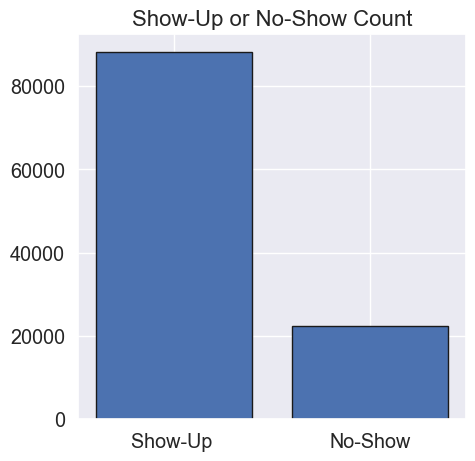

In [27]:
sns.set(rc={'figure.figsize':(5, 5)}, font_scale=1.3)
plt.bar(['Show-Up ' ,'No-Show'],df['No-show'].value_counts(),facecolor = 'b',edgecolor='k')
plt.title('Show-Up or No-Show Count',size = 16)
plt.show()

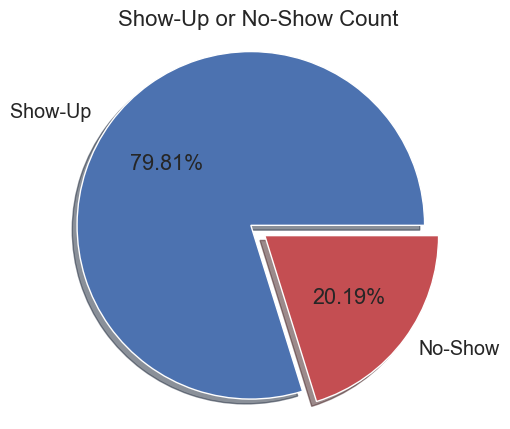

In [28]:
plt.pie(df['No-show'].value_counts(),labels=['Show-Up ' ,'No-Show'],
        shadow= True, autopct='%.2f%%', colors =['b','r'], explode = [0.1,0])
plt.title('Show-Up or No-Show Count',size = 16)
plt.axis ('equal')
plt.show()

Conclusion : Most of patient people has been showed up to appointments

Does Males Showed up to Appointments more than Females ?

In [29]:
showed = df[df['No-show']=='No']
un_showed = df[df['No-show']=='Yes']

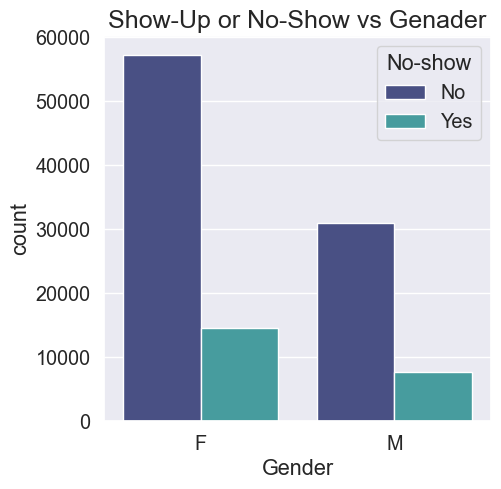

In [30]:
sns.countplot(x=df['Gender'],hue=df['No-show'],palette='mako')
plt.title('Show-Up or No-Show vs Genader',size = 18)
plt.show()

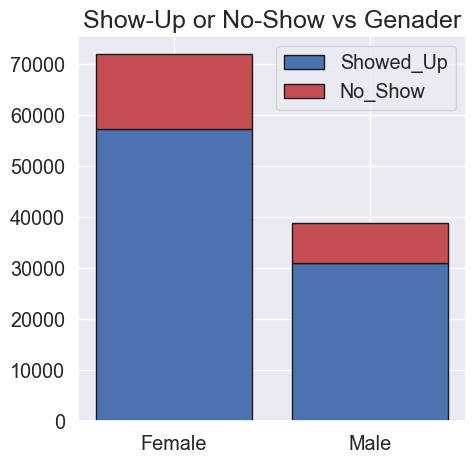

In [31]:
labels = ['Female', 'Male']
fig, ax = plt.subplots(figsize=(5,5))
ax.bar(labels, showed['Gender'].value_counts(), label='Showed_Up'
                       ,facecolor ='b',edgecolor='k')
ax.bar(labels, un_showed['Gender'].value_counts(), bottom=showed['Gender'].value_counts(),
       label="No_Show",facecolor ='r',edgecolor='k')
plt.title('Show-Up or No-Show vs Genader',size = 18)
ax.legend()

Conclusion : Patients Females have been shown up to appointments more than Patients Males

Diabetes

In [32]:
df.groupby(['Diabetes']).mean()['Age']

Diabetes
No     35.209051
Yes    61.372529
Name: Age, dtype: float64

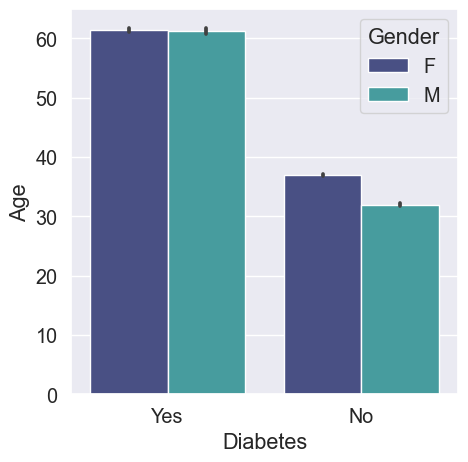

In [33]:
sns.barplot(x=df['Diabetes'],y =df['Age'],order=['Yes','No'],palette='mako',hue=df['Gender'])
plt.show()

Hypertension

In [34]:
df.groupby(['Hypertension']).mean()['Age']

Hypertension
No     31.308826
Yes    60.613596
Name: Age, dtype: float64

<AxesSubplot:xlabel='Hypertension', ylabel='Age'>

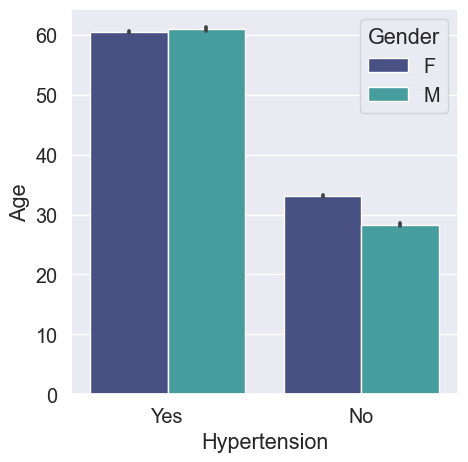

In [35]:
sns.barplot(x=df['Hypertension'],y =df['Age'],order=['Yes','No'],palette='mako',hue=df['Gender'])

Handicap

In [36]:
df.groupby(['Handicap']).mean()['Age']

Handicap
No     36.810818
Yes    50.561411
Name: Age, dtype: float64

<AxesSubplot:xlabel='Handicap', ylabel='Age'>

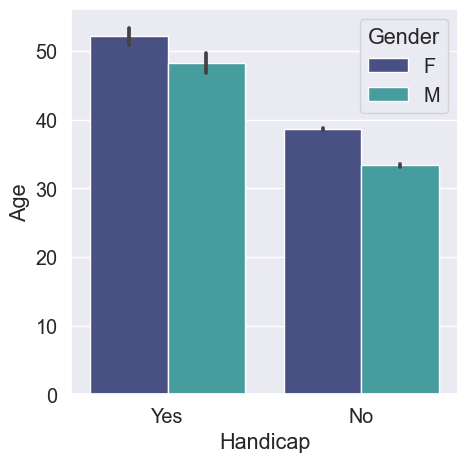

In [37]:
sns.barplot(x=df['Handicap'],y =df['Age'],order=['Yes','No'],palette='mako',hue=df['Gender'])

Conclusions :

The average age of male Diabetics is equal to the average age of female Diabetics

The average age of male Hypertension is equal to the average age of female Hypertension

The average age of male Handicaps is less than to the average age of female Handicaps

Who is more Alcoholism , Males or Females ?

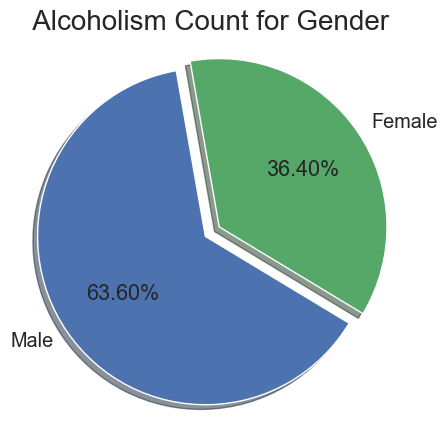

In [38]:
Alcoholism = df[df['Alcoholism']=='Yes']
plt.pie(Alcoholism['Gender'].value_counts(),labels = ['Male','Female'],
        shadow= True, autopct='%.2f%%', colors =['b','g'], explode = [0.1,0],startangle=100)
plt.title(' Alcoholism Count for Gender ',size = 20)
plt.axis ('equal')
plt.show()

How Many Waiting Days for Appointments in the Most ?

In [39]:
df['Waiting_Days'].value_counts()

0      38562
2       6725
4       5290
1       5213
7       4906
       ...  
132        1
125        1
117        1
146        1
123        1
Name: Waiting_Days, Length: 129, dtype: int64

<AxesSubplot:xlabel='Waiting_Days', ylabel='Density'>

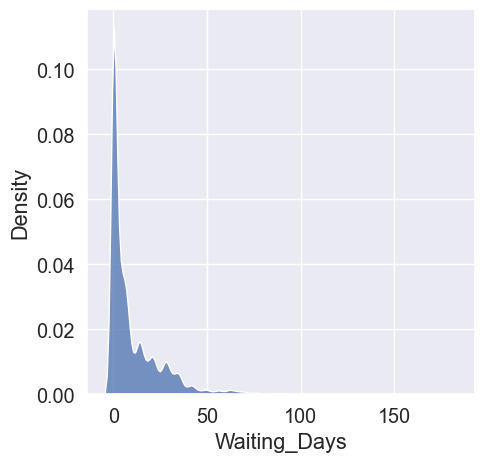

In [40]:
sns.kdeplot(x= df['Waiting_Days'],shade=True,multiple='stack')

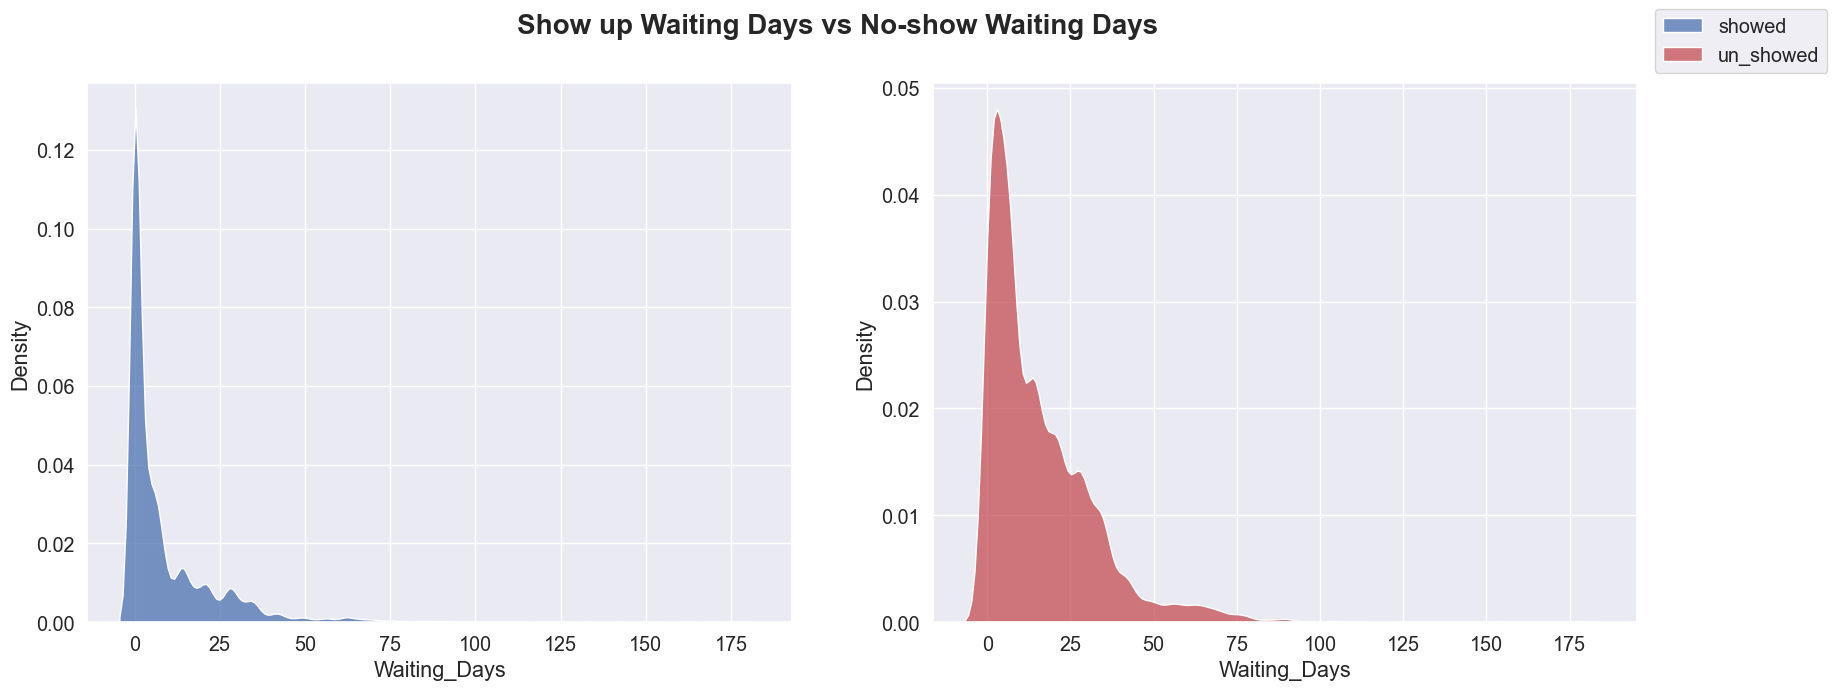

In [41]:
fig, axes = plt.subplots(1,2 , figsize= (20,7)) 
fig.suptitle ('Show up Waiting Days vs No-show Waiting Days',fontsize=20,fontweight='bold')
sns.kdeplot(ax=axes [0], data=showed['Waiting_Days'],color='b',shade=True,multiple='stack',label = 'showed')
sns.kdeplot(ax=axes [1], data=un_showed['Waiting_Days'],color='r',shade=True,multiple='stack',label = 'un_showed')
fig.legend()

Conclusions :

Commen Waiting Days for Patients is from 0 to 25 days

Patients who showup waits from 0 to 30 days

Patients who no-show waits from 0 to 65 days

# What is Average of Waiting Days for Patients with Chronic Diseases ?

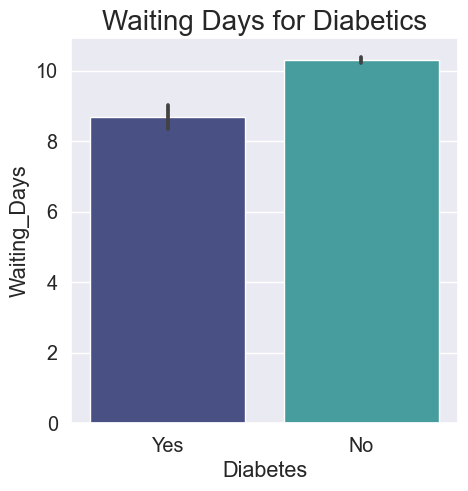

In [42]:
sns.barplot(x=df['Diabetes'],y=df['Waiting_Days'],order=['Yes','No'],palette='mako')
plt.title('Waiting Days for Diabetics',size = 20)
plt.show()

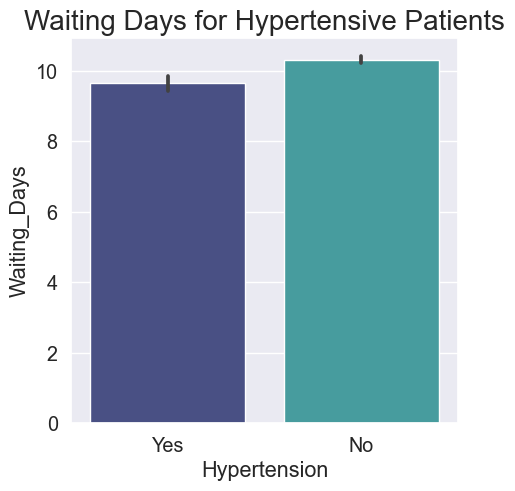

In [43]:
sns.barplot(x=df['Hypertension'],y =df['Waiting_Days'],order=['Yes','No'],palette='mako')
plt.title('Waiting Days for Hypertensive Patients',size = 20)
plt.show()

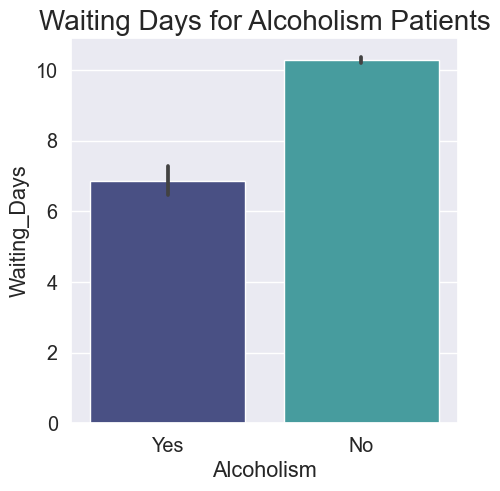

In [44]:
sns.barplot(x=df['Alcoholism'],y =df['Waiting_Days'],order=['Yes','No'],palette='mako')
plt.title('Waiting Days for Alcoholism Patients',size = 20)
plt.show()

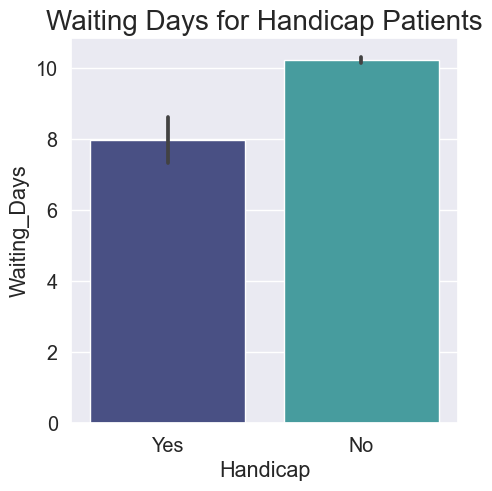

In [45]:
sns.barplot(x=df['Handicap'],y =df['Waiting_Days'],order=['Yes','No'],palette='mako')
plt.title('Waiting Days for Handicap Patients',size = 20)
plt.show()

# Is there Relation between Receiving SMS and Showing up to Appointments ?

<AxesSubplot:xlabel='SMS_received', ylabel='count'>

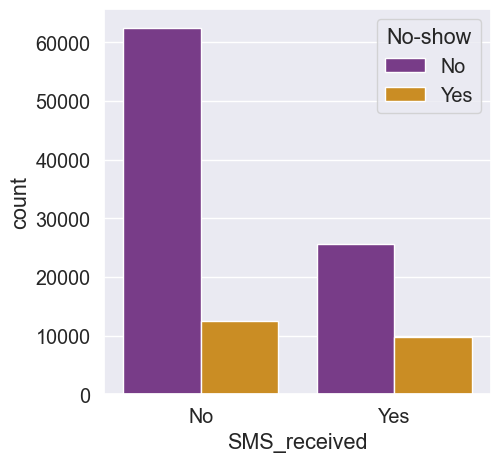

In [46]:
sns.countplot(x=df['SMS_received'],hue=df['No-show'],palette='CMRmap')

# What is Age of Patients who Shown up to Appointments ?

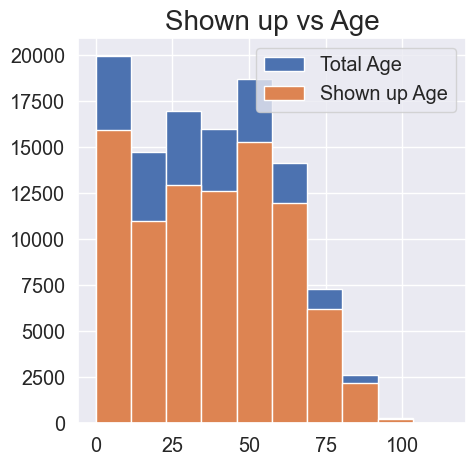

In [47]:
plt.hist(x=df['Age'],bins=10)
plt.hist(x=showed['Age'],bins=10)
plt.title('Shown up vs Age', fontsize=20)
plt.legend(labels = ['Total Age','Shown up Age'])
plt.show()

Conclusions : The highest numbers of appointments are made by Patients in age range between (0 to 10) and (50 to 60).

# What are the Five Most Neighborhoods where Patients are Shown up to Appointments ?

In [48]:
showed['Neighbourhood'].value_counts().head()

JARDIM CAMBURI     6252
MARIA ORTIZ        4586
RESISTÊNCIA        3525
JARDIM DA PENHA    3246
SANTA MARTHA       2635
Name: Neighbourhood, dtype: int64

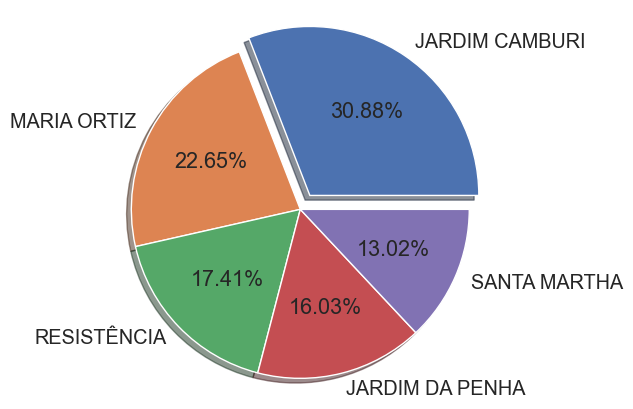

In [49]:
plt.pie(showed['Neighbourhood'].value_counts().head(),labels=showed['Neighbourhood'].value_counts().head().index,
        shadow= True, autopct='%.2f%%',  explode = [0.1,0,0,0,0])
plt.axis ('equal')
plt.show()

# Did Day affect on Showing up to Appointments ?

In [50]:
df['Appointment_Day_Name'].value_counts()

Wednesday    25866
Tuesday      25638
Monday       22713
Friday       19019
Thursday     17246
Saturday        39
Name: Appointment_Day_Name, dtype: int64

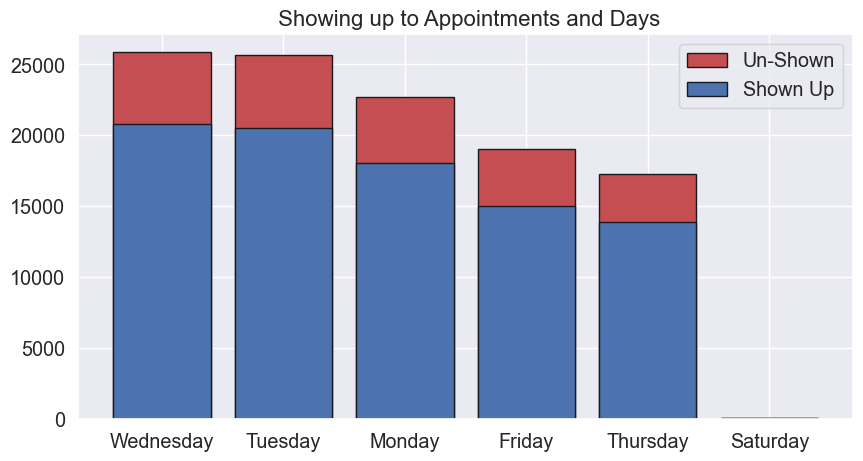

In [51]:
fig, ax = plt.subplots(figsize=(10,5))
plt.bar(df['Appointment_Day_Name'].value_counts().index ,df['Appointment_Day_Name'].value_counts(),
        facecolor = 'r',edgecolor='k')
plt.bar(showed['Appointment_Day_Name'].value_counts().index ,showed['Appointment_Day_Name'].value_counts(),
        facecolor = 'b',edgecolor='k')
plt.title(' Showing up to Appointments and Days',size = 16)
plt.legend(['Un-Shown','Shown Up'])
plt.show()

# Data Preprocessing

In [22]:
df1 = df[df['Appointment_Day_Name']=='Wednesday']
df1

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,...,Scheduled_Day,Scheduled_Day_Name,Scheduled_Year,Appointment_Month_Name,Appointment_Month,Appointment_Day,Appointment_Day_Name,Appointment_Year,Appointment_Date,Waiting_Days
3310,F,2016-05-04,2016-05-04 00:00:00+00:00,32,MARIA ORTIZ,No,No,No,No,No,...,4,Wednesday,2016,May,5,4,Wednesday,2016,2016-05-04,0
3311,F,2016-05-04,2016-05-04 00:00:00+00:00,63,MARIA ORTIZ,No,No,No,No,No,...,4,Wednesday,2016,May,5,4,Wednesday,2016,2016-05-04,0
3312,F,2016-05-04,2016-05-04 00:00:00+00:00,66,MARIA ORTIZ,No,No,No,No,No,...,4,Wednesday,2016,May,5,4,Wednesday,2016,2016-05-04,0
3313,F,2016-05-04,2016-05-04 00:00:00+00:00,27,MARIA ORTIZ,No,No,No,No,No,...,4,Wednesday,2016,May,5,4,Wednesday,2016,2016-05-04,0
3314,F,2016-05-04,2016-05-04 00:00:00+00:00,67,JABOUR,No,No,No,No,No,...,4,Wednesday,2016,May,5,4,Wednesday,2016,2016-05-04,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110512,F,2016-06-08,2016-06-08 00:00:00+00:00,41,MARIA ORTIZ,No,No,No,No,No,...,8,Wednesday,2016,June,6,8,Wednesday,2016,2016-06-08,0
110513,M,2016-06-08,2016-06-08 00:00:00+00:00,2,ANTÔNIO HONÓRIO,No,No,No,No,No,...,8,Wednesday,2016,June,6,8,Wednesday,2016,2016-06-08,0
110514,F,2016-06-08,2016-06-08 00:00:00+00:00,58,MARIA ORTIZ,No,No,No,No,No,...,8,Wednesday,2016,June,6,8,Wednesday,2016,2016-06-08,0
110515,M,2016-06-06,2016-06-08 00:00:00+00:00,33,MARIA ORTIZ,No,Yes,No,No,No,...,6,Monday,2016,June,6,8,Wednesday,2016,2016-06-08,2


In [23]:
df1.columns

Index(['Gender', 'ScheduledDay', 'AppointmentDay', 'Age', 'Neighbourhood',
       'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism', 'Handicap',
       'SMS_received', 'No-show', 'Scheduled_Month_Name', 'Scheduled_Month',
       'Scheduled_Day', 'Scheduled_Day_Name', 'Scheduled_Year',
       'Appointment_Month_Name', 'Appointment_Month', 'Appointment_Day',
       'Appointment_Day_Name', 'Appointment_Year', 'Appointment_Date',
       'Waiting_Days'],
      dtype='object')

In [24]:
df1.drop(['Appointment_Date',
         'Scheduled_Month_Name','Appointment_Month_Name','AppointmentDay','ScheduledDay'], axis = 1 , inplace = True)

C:\Users\hamidreza\AppData\Local\Temp\ipykernel_12096\2779834638.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(['Appointment_Date',


In [25]:
#df.drop(['AppointmentDay','ScheduledDay'], axis = 1 , inplace = True)

In [26]:
df1

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,Scheduled_Month,Scheduled_Day,Scheduled_Day_Name,Scheduled_Year,Appointment_Month,Appointment_Day,Appointment_Day_Name,Appointment_Year,Waiting_Days
3310,F,32,MARIA ORTIZ,No,No,No,No,No,No,No,5,4,Wednesday,2016,5,4,Wednesday,2016,0
3311,F,63,MARIA ORTIZ,No,No,No,No,No,No,No,5,4,Wednesday,2016,5,4,Wednesday,2016,0
3312,F,66,MARIA ORTIZ,No,No,No,No,No,No,No,5,4,Wednesday,2016,5,4,Wednesday,2016,0
3313,F,27,MARIA ORTIZ,No,No,No,No,No,No,No,5,4,Wednesday,2016,5,4,Wednesday,2016,0
3314,F,67,JABOUR,No,No,No,No,No,No,No,5,4,Wednesday,2016,5,4,Wednesday,2016,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110512,F,41,MARIA ORTIZ,No,No,No,No,No,No,No,6,8,Wednesday,2016,6,8,Wednesday,2016,0
110513,M,2,ANTÔNIO HONÓRIO,No,No,No,No,No,No,No,6,8,Wednesday,2016,6,8,Wednesday,2016,0
110514,F,58,MARIA ORTIZ,No,No,No,No,No,No,No,6,8,Wednesday,2016,6,8,Wednesday,2016,0
110515,M,33,MARIA ORTIZ,No,Yes,No,No,No,No,Yes,6,6,Monday,2016,6,8,Wednesday,2016,2


In [27]:
df1 = pd.get_dummies(df1, columns=['Gender','Neighbourhood'], drop_first=True)

In [28]:
dict_yes_no = {
     'No':0,
     'Yes' : 1}
col_handled  = ['Scholarship','Hypertension','Diabetes','Alcoholism','Handicap','SMS_received','No-show']    
for col in col_handled :
    df1[col] = df1[col].map(dict_yes_no)

In [29]:
df1

,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,Scheduled_Month,Scheduled_Day,...,Neighbourhood_SANTOS REIS,Neighbourhood_SEGURANÇA DO LAR,Neighbourhood_SOLON BORGES,Neighbourhood_SÃO BENEDITO,Neighbourhood_SÃO CRISTÓVÃO,Neighbourhood_SÃO JOSÉ,Neighbourhood_SÃO PEDRO,Neighbourhood_TABUAZEIRO,Neighbourhood_UNIVERSITÁRIO,Neighbourhood_VILA RUBIM
3310,32,0,0,0,0,0,0,0,5,4,...,0,0,0,0,0,0,0,0,0,0
3311,63,0,0,0,0,0,0,0,5,4,...,0,0,0,0,0,0,0,0,0,0
3312,66,0,0,0,0,0,0,0,5,4,...,0,0,0,0,0,0,0,0,0,0
3313,27,0,0,0,0,0,0,0,5,4,...,0,0,0,0,0,0,0,0,0,0
3314,67,0,0,0,0,0,0,0,5,4,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110512,41,0,0,0,0,0,0,0,6,8,...,0,0,0,0,0,0,0,0,0,0
110513,2,0,0,0,0,0,0,0,6,8,...,0,0,0,0,0,0,0,0,0,0
110514,58,0,0,0,0,0,0,0,6,8,...,0,0,0,0,0,0,0,0,0,0
110515,33,0,1,0,0,0,0,1,6,6,...,0,0,0,0,0,0,0,0,0,0


In [30]:
for col in ['Appointment_Day_Name','Scheduled_Day_Name']:
    print(df1[col].unique())
    print('--'*50)

['Wednesday']
----------------------------------------------------------------------------------------------------
['Wednesday' 'Thursday' 'Tuesday' 'Monday' 'Friday' 'Saturday']
----------------------------------------------------------------------------------------------------


In [31]:
dict_week_order = {
    'Monday' : 1 , 
    'Tuesday' : 2,
    'Wednesday' : 3,
    'Thursday' : 4,
    'Friday' : 5,
    'Saturday' : 6
  }

In [32]:
for col in ['Appointment_Day_Name','Scheduled_Day_Name']:
    df1[col] = df1[col].map(dict_week_order)
    
for col in ['Appointment_Day_Name','Scheduled_Day_Name']:
    print(df1[col].unique())
    print('--'*50)

[3]
----------------------------------------------------------------------------------------------------
[3 4 2 1 5 6]
----------------------------------------------------------------------------------------------------


In [33]:
df1

,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,Scheduled_Month,Scheduled_Day,...,Neighbourhood_SANTOS REIS,Neighbourhood_SEGURANÇA DO LAR,Neighbourhood_SOLON BORGES,Neighbourhood_SÃO BENEDITO,Neighbourhood_SÃO CRISTÓVÃO,Neighbourhood_SÃO JOSÉ,Neighbourhood_SÃO PEDRO,Neighbourhood_TABUAZEIRO,Neighbourhood_UNIVERSITÁRIO,Neighbourhood_VILA RUBIM
3310,32,0,0,0,0,0,0,0,5,4,...,0,0,0,0,0,0,0,0,0,0
3311,63,0,0,0,0,0,0,0,5,4,...,0,0,0,0,0,0,0,0,0,0
3312,66,0,0,0,0,0,0,0,5,4,...,0,0,0,0,0,0,0,0,0,0
3313,27,0,0,0,0,0,0,0,5,4,...,0,0,0,0,0,0,0,0,0,0
3314,67,0,0,0,0,0,0,0,5,4,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110512,41,0,0,0,0,0,0,0,6,8,...,0,0,0,0,0,0,0,0,0,0
110513,2,0,0,0,0,0,0,0,6,8,...,0,0,0,0,0,0,0,0,0,0
110514,58,0,0,0,0,0,0,0,6,8,...,0,0,0,0,0,0,0,0,0,0
110515,33,0,1,0,0,0,0,1,6,6,...,0,0,0,0,0,0,0,0,0,0


In [34]:
df1.drop(['Appointment_Year','Scheduled_Year'] , axis = 1 , inplace = True)

In [60]:
df2 =df1.copy()

df4 = df1.copy()

In [61]:
df2

,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,Scheduled_Month,Scheduled_Day,...,Neighbourhood_SANTOS REIS,Neighbourhood_SEGURANÇA DO LAR,Neighbourhood_SOLON BORGES,Neighbourhood_SÃO BENEDITO,Neighbourhood_SÃO CRISTÓVÃO,Neighbourhood_SÃO JOSÉ,Neighbourhood_SÃO PEDRO,Neighbourhood_TABUAZEIRO,Neighbourhood_UNIVERSITÁRIO,Neighbourhood_VILA RUBIM
3310,32,0,0,0,0,0,0,0,5,4,...,0,0,0,0,0,0,0,0,0,0
3311,63,0,0,0,0,0,0,0,5,4,...,0,0,0,0,0,0,0,0,0,0
3312,66,0,0,0,0,0,0,0,5,4,...,0,0,0,0,0,0,0,0,0,0
3313,27,0,0,0,0,0,0,0,5,4,...,0,0,0,0,0,0,0,0,0,0
3314,67,0,0,0,0,0,0,0,5,4,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110512,41,0,0,0,0,0,0,0,6,8,...,0,0,0,0,0,0,0,0,0,0
110513,2,0,0,0,0,0,0,0,6,8,...,0,0,0,0,0,0,0,0,0,0
110514,58,0,0,0,0,0,0,0,6,8,...,0,0,0,0,0,0,0,0,0,0
110515,33,0,1,0,0,0,0,1,6,6,...,0,0,0,0,0,0,0,0,0,0


,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,Scheduled_Month,Scheduled_Day,...,Neighbourhood_SANTOS REIS,Neighbourhood_SEGURANÇA DO LAR,Neighbourhood_SOLON BORGES,Neighbourhood_SÃO BENEDITO,Neighbourhood_SÃO CRISTÓVÃO,Neighbourhood_SÃO JOSÉ,Neighbourhood_SÃO PEDRO,Neighbourhood_TABUAZEIRO,Neighbourhood_UNIVERSITÁRIO,Neighbourhood_VILA RUBIM
0,0.32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.363636,0.100000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.63,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.363636,0.100000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.66,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.363636,0.100000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.363636,0.100000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.67,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.363636,0.100000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25861,0.41,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.454545,0.233333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25862,0.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.454545,0.233333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25863,0.58,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.454545,0.233333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25864,0.33,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.454545,0.166667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [62]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# load the data
y = df2['No-show']
x = df2.drop(['No-show'],axis=1)
test = SelectKBest(score_func=chi2, k=10)
X_new = test.fit_transform(x, y)
fit = test.fit(x, y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features


                              Specs         Score
13                     Waiting_Days  15915.665441
0                               Age   1921.313612
8                     Scheduled_Day    624.150653
6                      SMS_received    313.616858
7                   Scheduled_Month     64.059105
2                      Hypertension     26.882348
48            Neighbourhood_ITARARÉ     26.465305
52  Neighbourhood_JESUS DE NAZARETH     24.010468
1                       Scholarship     19.115411
68           Neighbourhood_REDENÇÃO     14.250328


In [63]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
d = scaler.fit_transform(df4)
scaled_df = pd.DataFrame(d, columns=df4.columns)
scaled_df

,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,Scheduled_Month,Scheduled_Day,...,Neighbourhood_SANTOS REIS,Neighbourhood_SEGURANÇA DO LAR,Neighbourhood_SOLON BORGES,Neighbourhood_SÃO BENEDITO,Neighbourhood_SÃO CRISTÓVÃO,Neighbourhood_SÃO JOSÉ,Neighbourhood_SÃO PEDRO,Neighbourhood_TABUAZEIRO,Neighbourhood_UNIVERSITÁRIO,Neighbourhood_VILA RUBIM
0,0.32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.363636,0.100000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.63,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.363636,0.100000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.66,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.363636,0.100000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.363636,0.100000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.67,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.363636,0.100000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25861,0.41,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.454545,0.233333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25862,0.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.454545,0.233333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25863,0.58,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.454545,0.233333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25864,0.33,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.454545,0.166667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Imbalanced Classes Handling

In [64]:
y = scaled_df['No-show']
x = scaled_df.drop(['No-show'],axis=1)
from imblearn.over_sampling import SMOTE
sampler = SMOTE()
x1 , y1 = sampler.fit_resample(x,y)

In [65]:
x_train , x_test, y_train , y_test = train_test_split(x1 ,y1,test_size=0.2,random_state=42,shuffle=True)

In [66]:
x_train_no_show = x_train[['Age','SMS_received','Scheduled_Month','Waiting_Days','Scheduled_Day']]
x_test_no_show = x_test[['Age','SMS_received','Scheduled_Month','Waiting_Days','Scheduled_Day']]


In [67]:
y1.value_counts(normalize = True)

0.0    0.5
1.0    0.5
Name: No-show, dtype: float64

# Modelling and Evalution for no-show prediction

In [68]:

def results(y_test, y_pred):
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print('accuracy_score:', accuracy_score(y_test, y_pred))
    print('precision_score:', precision_score(y_test, y_pred))
    print('roc_auc_score:', roc_auc_score(y_test, y_pred))

DecisionTreeClassifier

In [69]:
decision_tree = DecisionTreeClassifier(criterion = 'entropy')
decision_tree.fit(x_train_no_show, y_train)
y_pred_dt = decision_tree.predict(x_test_no_show)
print('Using Decision Tree Model')
print('-'*50)
print(f'Training Accuracy: {decision_tree.score(x_train_no_show, y_train)}')
print(f'Testing Accuracy: {accuracy_score(y_test, y_pred_dt)}')

Using Decision Tree Model
--------------------------------------------------
Training Accuracy: 0.9322462242012155
Testing Accuracy: 0.8015643802647413


RandomForestClassifier

In [70]:
random_forest = RandomForestClassifier(n_estimators=200,max_depth=7)
random_forest.fit(x_train_no_show, y_train)
y_pred_rf = random_forest.predict(x_test_no_show)
print('Using Random Forest Model')
print('-'*50)
print(f'Training Accuracy: {random_forest.score(x_train_no_show, y_train)}')
print(f'Testing Accuracy: {accuracy_score(y_test, y_pred_rf)}')

Using Random Forest Model
--------------------------------------------------
Training Accuracy: 0.7530838197244119
Testing Accuracy: 0.7438026474127557


GradientBoostingClassifier

In [71]:
gradient_boosting = GradientBoostingClassifier(n_estimators=250,max_depth =9)
gradient_boosting.fit(x_train_no_show, y_train)
y_pred_gb = gradient_boosting.predict(x_test_no_show)
print('Using Gradient Boosting Model')
print('-'*50)
print(f'Training Accuracy: {gradient_boosting.score(x_train_no_show, y_train)}')
print(f'Testing Accuracy: {accuracy_score(y_test, y_pred_gb)}')

Using Gradient Boosting Model
--------------------------------------------------
Training Accuracy: 0.9184066429989771
Testing Accuracy: 0.8521058965102286


XGBClassifier

In [72]:
xgboost = XGBClassifier(n_estimators=250,max_depth=11,learning_rate=0.2)
xgboost.fit(x_train_no_show, y_train)
y_pred_xg = xgboost.predict(x_test_no_show)
print('Using XGboost Model')
print('-'*50)
print(f'Training Accuracy: {xgboost.score(x_train_no_show, y_train)}')
print(f'Testing Accuracy: {accuracy_score(y_test, y_pred_xg)}')

Using XGboost Model
--------------------------------------------------
Training Accuracy: 0.9217762801612612
Testing Accuracy: 0.8500601684717208


In [73]:
# Evaluate the performance of the models
print("Decision Tree Results:")
results(y_test, y_pred_dt)

print("Random Forest Results:")
results(y_test, y_pred_rf)

print("Gradient Boosting Results:")
results(y_test, y_pred_gb)

print("XGB Results:")
results(y_test, y_pred_xg)

Decision Tree Results:
[[3596  548]
 [1101 3065]]
              precision    recall  f1-score   support

         0.0       0.77      0.87      0.81      4144
         1.0       0.85      0.74      0.79      4166

    accuracy                           0.80      8310
   macro avg       0.81      0.80      0.80      8310
weighted avg       0.81      0.80      0.80      8310

accuracy_score: 0.8015643802647413
precision_score: 0.8483254912814835
roc_auc_score: 0.8017391662974958
Random Forest Results:
[[2702 1442]
 [ 687 3479]]
              precision    recall  f1-score   support

         0.0       0.80      0.65      0.72      4144
         1.0       0.71      0.84      0.77      4166

    accuracy                           0.74      8310
   macro avg       0.75      0.74      0.74      8310
weighted avg       0.75      0.74      0.74      8310

accuracy_score: 0.7438026474127557
precision_score: 0.7069701280227596
roc_auc_score: 0.7435603210027117
Gradient Boosting Results:
[[3783  3

In [74]:
y_pred_gb

array([1., 0., 1., ..., 0., 0., 1.])

In [75]:
x_test['No-show']=y_pred_gb

In [76]:
x_test

,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Scheduled_Month,Scheduled_Day,Scheduled_Day_Name,...,Neighbourhood_SEGURANÇA DO LAR,Neighbourhood_SOLON BORGES,Neighbourhood_SÃO BENEDITO,Neighbourhood_SÃO CRISTÓVÃO,Neighbourhood_SÃO JOSÉ,Neighbourhood_SÃO PEDRO,Neighbourhood_TABUAZEIRO,Neighbourhood_UNIVERSITÁRIO,Neighbourhood_VILA RUBIM,No-show
38261,0.039174,0.0,0.0,0.0,0.0,0.0,0.0,0.363636,0.624739,0.200000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
20911,0.330000,0.0,0.0,0.0,0.0,0.0,0.0,0.363636,0.333333,0.400000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36662,0.137581,0.0,0.0,0.0,0.0,0.0,1.0,0.329179,0.638978,0.151612,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
15801,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.363636,0.500000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4702,0.210000,1.0,0.0,0.0,0.0,0.0,0.0,0.363636,0.566667,0.400000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40157,0.145144,0.0,0.0,0.0,0.0,0.0,0.0,0.363636,0.033333,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
15854,0.150000,0.0,0.0,0.0,0.0,0.0,0.0,0.363636,0.566667,0.400000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1387,0.540000,0.0,1.0,0.0,0.0,0.0,0.0,0.363636,0.600000,0.600000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18334,0.320000,0.0,0.0,0.0,0.0,0.0,0.0,0.454545,0.233333,0.400000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [77]:
x_test['priority']=x_test['Hypertension']*0.414 + x_test['Diabetes']*0.146 + x_test['Alcoholism']*0.096 +x_test['Handicap']*0.344

In [78]:
x_test

,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Scheduled_Month,Scheduled_Day,Scheduled_Day_Name,...,Neighbourhood_SOLON BORGES,Neighbourhood_SÃO BENEDITO,Neighbourhood_SÃO CRISTÓVÃO,Neighbourhood_SÃO JOSÉ,Neighbourhood_SÃO PEDRO,Neighbourhood_TABUAZEIRO,Neighbourhood_UNIVERSITÁRIO,Neighbourhood_VILA RUBIM,No-show,priority
38261,0.039174,0.0,0.0,0.0,0.0,0.0,0.0,0.363636,0.624739,0.200000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000
20911,0.330000,0.0,0.0,0.0,0.0,0.0,0.0,0.363636,0.333333,0.400000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000
36662,0.137581,0.0,0.0,0.0,0.0,0.0,1.0,0.329179,0.638978,0.151612,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000
15801,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.363636,0.500000,0.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000
4702,0.210000,1.0,0.0,0.0,0.0,0.0,0.0,0.363636,0.566667,0.400000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40157,0.145144,0.0,0.0,0.0,0.0,0.0,0.0,0.363636,0.033333,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000
15854,0.150000,0.0,0.0,0.0,0.0,0.0,0.0,0.363636,0.566667,0.400000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000
1387,0.540000,0.0,1.0,0.0,0.0,0.0,0.0,0.363636,0.600000,0.600000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.414
18334,0.320000,0.0,0.0,0.0,0.0,0.0,0.0,0.454545,0.233333,0.400000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000


In [79]:

# export the DataFrame to an Excel file
x_test.to_excel('no-show-co.xlsx', index=False)